In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [87]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [88]:
X_train = train_images.astype('float32')/255.0
X_test = test_images.astype('float32')/255.0

In [89]:
np.unique(train_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [90]:
from turtle import mode
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(28, 28, 1),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(64,activation='relu'))
#model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [91]:
model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 5, 5, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1600)             

In [92]:
epochs = 20


In [93]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopper = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train,train_labels,epochs=epochs,validation_data=(X_test,test_labels),batch_size=32,callbacks=[early_stopper])

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5001 - accuracy: 0.8168 - val_loss: 0.3347 - val_accuracy: 0.8772
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3222 - accuracy: 0.8825 - val_loss: 0.3020 - val_accuracy: 0.8848
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2809 - accuracy: 0.8956 - val_loss: 0.2636 - val_accuracy: 0.9039
Epoch 4/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2550 - accuracy: 0.9058 - val_loss: 0.2533 - val_accuracy: 0.9064
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2391 - accuracy: 0.9120 - val_loss: 0.2365 - val_accuracy: 0.9128
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2216 - accuracy: 0.9175 - val_loss: 0.2372 - val_accuracy: 0.9103
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2116 - accuracy: 0.9213 - val_loss: 0.2320 - val_ac

In [94]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

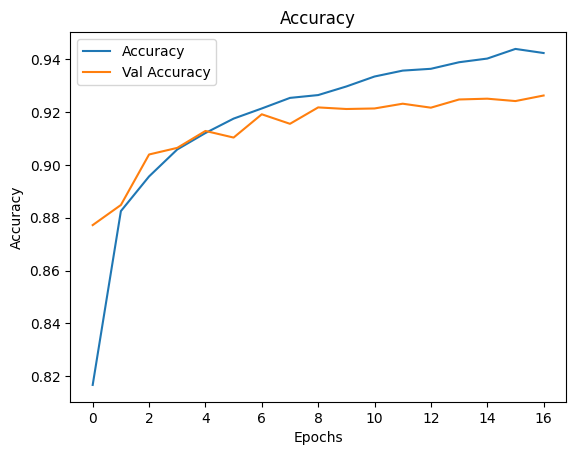

In [95]:
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history['val_accuracy'],label="Val Accuracy")
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

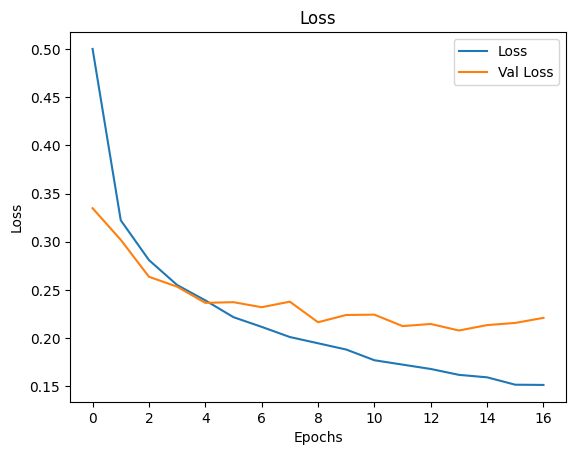

In [96]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="Val Loss")
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [97]:
test_loss, test_accuracy = model.evaluate(X_test, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9247
Test Loss: 0.2078
Test Accuracy: 92.47%


In [98]:
print("\n--- Classification Report ---")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(test_labels, y_pred_classes))


--- Classification Report ---
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       1.00      0.99      0.99      1000
           2       0.89      0.89      0.89      1000
           3       0.91      0.94      0.93      1000
           4       0.89      0.89      0.89      1000
           5       0.99      0.99      0.99      1000
           6       0.77      0.76      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

